# Week 10

Ray Hu & Xietao Wang Lin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.stats import maxwell
from scipy import special
import pandas as pd
%matplotlib inline
pd.set_option('expand_frame_repr', False)

Parameters

In [2]:
gridPoints = 10

In [3]:
rods = np.loadtxt('rods.dat')
motors = np.loadtxt('motors.dat')
length = np.loadtxt('length_final.dat')
allLengths = np.loadtxt('length_all.dat')

numberOfRods = rods[:, 0].size



In [4]:
def calculateMotorPositions(RodsMatrix, MotorMatrix, numberOfMotors):

    motorPositions = np.zeros(numberOfMotors)
    position = RodsMatrix[0, 0] + MotorMatrix[0, 0]
    motorPositions[0] = position
    for motor in range(1, numberOfMotors):
        position = (RodsMatrix[motor, 0] + MotorMatrix[motor, 0])
        motorPositions[motor] = position
    
    return motorPositions

def plotSystem(RodsMatrix, MotorsMatrix, numberOfRods, gridPoints):

    motorPos = calculateMotorPositions(RodsMatrix, MotorsMatrix, numberOfRods)
    for row in range(0, numberOfRods):
        'Rods'
        y_r = np.ones(gridPoints)*row*0.2
        x_r = np.linspace(RodsMatrix[row, 0], RodsMatrix[row, 0] + RodsMatrix[row, 1], gridPoints, endpoint=True)
        
        plt.plot(x_r, y_r)
        'Motors'
        y_m = row*0.2 + 0.1
        x_m = motorPos[row]
        plt.scatter(x_m, y_m)

    plt.xlabel('x coordinate, motors in dots')
    plt.ylabel('Rods, rod 1 is y = 0, next rod is y += 0.2')
    plt.title('1D System')
    plt.show()

def plotMotorPositions(rods, motors, numberOfRods):

    motorsPos = calculateMotorPositions(rods, motors, numberOfRods)
    plt.hist(motorsPos, 20)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of motors')
    plt.title('Motor distribution')
    plt.show()

def rodMidPointPositions(rods, numberOfRods):

    midPoints = np.zeros(numberOfRods)
    for point in range(0, numberOfRods):
        midPoints[point] = rods[point, 0] + rods[point, 1]*0.5
    plt.hist(midPoints, 10)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of rod-midpoints')
    plt.title('Rod distribution')
    plt.show()

def bothPositions(rods, motors, numberOfRods):

    midPoints = np.zeros(numberOfRods)
    for point in range(0, numberOfRods):
        midPoints[point] = rods[point, 0] + rods[point, 1]*0.5
    motorsPos = calculateMotorPositions(rods, motors, numberOfRods)
    plt.hist(motorsPos, 10)
    plt.hist(midPoints, 10)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of rod-midpoints/motors')
    plt.title('Rod/motor distribution')
    plt.show()

def averageLengthEvolution(allLengths):
    means = np.zeros(allLengths[0, :].size)
    for tstep in range(0, allLengths[0, :].size):
        mean = np.mean(allLengths[:, tstep])
        means[tstep] = mean
    
    plt.plot(np.linspace(0, means.size, means.size), (means))
    plt.xlabel('Time step')
    plt.ylabel('Average length')
    plt.title('Average length, 2000 simulations, v_d = v_p = 0.01')
    #plt.plot(np.linspace(0, means.size-150, means.size-150), means[:50])
    plt.show()
    
    

def motorRelativePositions(motors):
    plt.hist(motors[:, 0], 10000, (0,1), density=True)
    plt.show()
    

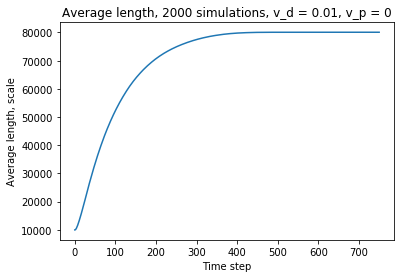

In [5]:

means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean
    
plt.plot(np.linspace(0, means.size, means.size), (means))
plt.xlabel('Time step')
plt.ylabel('Average length, scale')
plt.title('Average length, 2000 simulations, v_d = 0.01, v_p = 0')
#plt.plot(np.linspace(1, means.size-150, means.size-150), np.log(means[:50]))
plt.show()

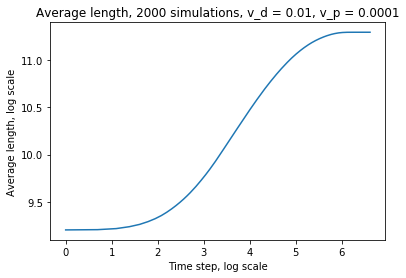

In [6]:
def line(x, a, b):
    return a*x + b

def quadratic(x, a, b, c):
    return a*np.exp(x) + b*x + c

means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean

#x = np.log(np.linspace(0, means.size-185, means.size-185))
#y = np.log(means[0:15])
plt.plot(np.log(np.linspace(1, means.size, means.size)), np.log(means))
plt.xlabel('Time step, log scale')
plt.ylabel('Average length, log scale')
plt.title('Average length, 2000 simulations, v_d = 0.01, v_p = 0.0001')
plt.show()
#plt.scatter(x, y)


In [7]:

popt, pcov = curve_fit(quadratic, x, y)
print(f'optimal = {popt}')
a_1, b_1, c_1 = popt
cov_1 = pcov
plt.plot(x, quadratic(x, a_1, b_1, c_1))
print(f'sqrt of cov = {np.sqrt(np.diag(pcov))}')


popt, pcov = curve_fit(line, x, y)
print(f'optimal, line = {popt}')
a_2, b_2 = popt
plt.plot(x, line(x, a_2, b_2))
print(f'sqrt of cov, line = {np.sqrt(np.diag(pcov))}')
plt.show()

plt.scatter(x, np.subtract(quadratic(x, a_1, b_1, c_1), y))
plt.scatter(x, np.subtract(line(x, a_2, b_2), y))
plt.show()

plt.imshow(np.abs(cov_1))
plt.colorbar()
plt.show()


NameError: name 'x' is not defined

In [ ]:
plotSystem(rods, motors, numberOfRods, gridPoints)

In [ ]:
plotMotorPositions(rods, motors, numberOfRods)

In [ ]:
rodMidPointPositions(rods, numberOfRods)

In [ ]:
bothPositions(rods, motors, numberOfRods)

In [ ]:
def lengthDistribution(lengths):

    plt.hist(lengths, 40, density=True)
    plt.xlabel('Length')
    plt.ylabel('Number')
    plt.title('Length distribution')
    params = maxwell.fit(lengths)
    x = np.linspace(1.5, 10, 100)
    plt.plot(x, maxwell.pdf(x, *params))
    plt.show()

lengthDistribution(length)


In [ ]:
means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean

#print(a,b)
def power_t(x, a, b):
    return np.exp(b)*np.power(x, a)
x = np.linspace(1, means.size-185, means.size-185)
plt.plot(np.linspace(0, means.size, means.size), (means))
plt.xlabel('Time step')
plt.ylabel('Average length')
plt.title('Average length, 2000 simulations, v_d = 0.01, v_p = 0.0001')
#plt.scatter(x, means[:15])
#plt.plot(x, power_t(x, a, b))

plt.show()
#plt.scatter(x, np.subtract(power_t(x, a,b), means[:15]))

In [ ]:
def exp(x, c):
    return np.exp(-c*x)

def line(x, a, b):
    return a*(x-1) + b

motors = np.loadtxt('motors.dat')
plt.hist(motors[:, 0], 30, (0,1), density=True)
#plt.show()

x = np.linspace(0, 1, 100)
#plt.plot(x, exp(x, c))


plt.show()
plt.hist(motors[:, 0], 30, (0.9,1))
print(np.extract(motors[:, 0] <= 0.999, motors).size)

In [ ]:
c = 6
def exp(x, a, b):
    return b*np.exp(a*x)
motors_a = np.loadtxt('motors.dat')
#plt.hist(motors_a[:, 0], 100, (0.7,1), density=True)
#plt.show()

x = np.linspace(0, 1, 100)
#plt.plot(x, exp(x, c))

bin_heights, bin_borders, _ = plt.hist(motors_a[:, 0], bins=10, label='histogram', density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, pcov = curve_fit(exp, bin_centers, bin_heights)
a, b = popt
print(f'Best fit: {popt}')
plt.plot(x, exp(x, a, b))
print(f'Covariance: {pcov}')
plt.title('v_p = v_d/180')
plt.xlabel('[0,1]')
plt.ylabel('Frequency')


plt.show()
plt.hist(motors_a[:, 0], 30, (0.9,1), density=True)
print(np.extract(motors_a[:, 0] <= 0.57, motors_a).size)

In [ ]:
def calculateError(allLength):
    errors = np.zeros(allLength[0, :].size)
    for tstep in range(0, allLength[0, :].size):
        error = np.std(allLength[:, tstep])
        errors[tstep] = error
    return errors

error = calculateError(allLengths)/2000

plt.plot((np.linspace(0, error.size, error.size)), (error))
plt.title('std/time graph, log scale')
plt.ylabel('std')
plt.xlabel('time step, log scale')
plt.show()

means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean

plt.errorbar((np.linspace(1, means.size, means.size)), (means), yerr=error, fmt='o')
plt.xlabel('Time step, log scale')
plt.ylabel('Average length, log scale')
plt.title('Average length, 2000 simulations, v_d = 0.01, v_p = 0.0001')
plt.show()



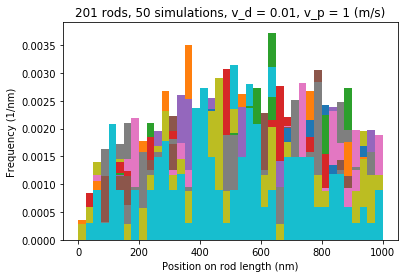

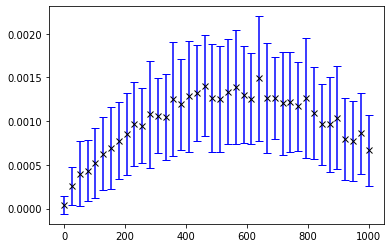

In [31]:
def exp(x, a, b):
    return b*np.exp(a*x)

def lineal(x, a, b):
    return a*(x-1000) + b

def parabola(x, a, b, c):
    return a*x*x + b*x + c
motors_all = np.loadtxt('motors_multiple.dat')

v_d = 0.01
v_p = 1

bins = 40
start_point = 0.1
end_point = 999.9

simuls = motors_all[:, 0].size
x = np.linspace(start_point, end_point, bins)
bins_vals = np.zeros((simuls, bins))
y = np.zeros(bins)
y_error = np.zeros(bins)
for i in range(simuls):
    bins_vals[i], bin_borders, _ = plt.hist(motors_all[i], bins, (start_point, end_point), density=True)
    
plt.title(f'201 rods, 50 simulations, v_d = {v_d}, v_p = {v_p} (m/s)')
plt.xlabel('Position on rod length (nm)')
plt.ylabel('Frequency (1/nm)')

for n in range(bins):
    y[n] = np.mean(bins_vals[:, n])
    y_error[n] = np.std(bins_vals[:, n])

plt.show()
cont, err, _ = plt.errorbar(x, y, zorder=10000, yerr=y_error, color='black', fmt='x', ecolor='blue', capsize=4)
#plt.plot(x, lineal(x, 0, 0.001), color='r')
plt.show()

xy = cont.get_xydata()

c(L) = 0.0006661819206936565
B exp(A(x-L)) |     A        |        B          |      L = 1000 nm
Best fit: [0.0003561969275444236, 0.00125990342735466]
Error +-: [0.00018812673400050853, 0.00012361053912844863]
-4.214614261552109e-06 0.004871418421698492 -7.980199512758656
[[ 7.29806081e-14 -7.81859476e-11  1.64032195e-08]
 [-7.81859476e-11  8.85589801e-08 -2.01724146e-05]
 [ 1.64032195e-08 -2.01724146e-05  5.39338572e-03]]
              0
0      1.000000
1      0.010000
2  10000.000000
3      0.000356
4      0.001260
5      0.000188
6      0.000124
7      0.000666


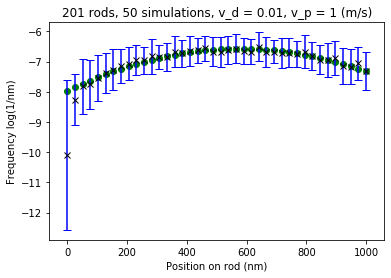

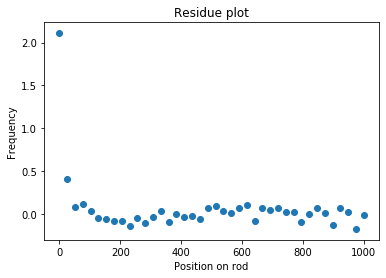

In [33]:
plt.errorbar(x, np.log(y), zorder=10000, yerr=np.divide(y_error,y), color='black', fmt='x', ecolor='blue', capsize=4)
#plt.scatter(x, y, zorder=9999)



epsilon = v_p/(v_d*v_d)
popt, pcov = curve_fit(lineal, x, np.log(y), sigma=np.divide(y_error,y))
a, b = popt
a_e, b_e = np.sqrt(np.diag(pcov))
b_e = np.exp(b)*b_e
print(f'c(L) = {y[-1]}')
print('B exp(A(x-L)) |     A        |        B          |      L = 1000 nm')
print(f'Best fit: {[a, np.exp(b)]}')
print(f'Error +-: {[a_e, b_e]}')
#plt.scatter(x, lineal(x, a, b), color='r')
popt, pcov = curve_fit(parabola, x, np.log(y), sigma=np.divide(y_error,y))
i, j, k = popt
plt.scatter(x, parabola(x, i, j, k), color='g')
print(i, j, k)
print(pcov)

result = [v_p, v_d, epsilon, a, np.exp(b), a_e, b_e, y[-1]]
r_df = pd.DataFrame(result)
r_df.to_clipboard(index=False, header=None)
print(r_df)
"""
theory = np.array([9.00, np.log(y[-1])-9])
plt.scatter(x, lineal(x, theory[0], theory[1]), color='green')
"""

"""
print(f'Theory  : {theory}')
"""
plt.title(f'201 rods, 50 simulations, v_d = {v_d}, v_p = {v_p} (m/s)')
plt.xlabel('Position on rod (nm)')
plt.ylabel('Frequency log(1/nm)')
plt.show()

plt.title('Residue plot')
plt.xlabel('Position on rod')
plt.ylabel('Frequency')
#plt.scatter(x, lineal(x, a, b)-np.log(y))
plt.scatter(x, parabola(x, i, j, k)-np.log(y))
plt.show()

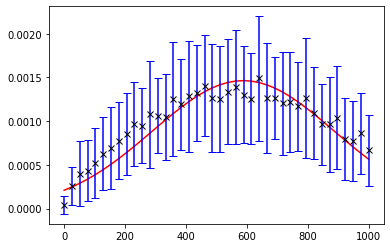

C:\Users\imnku\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


(588.4739106757796, 298.1877969952309, 1.0943189315878008)

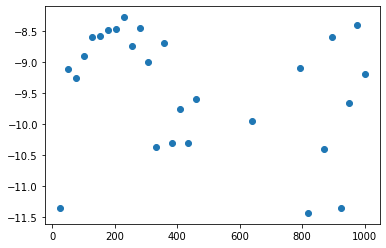

In [34]:
def gaussian(x, mu, sigma, c0):
    const = np.divide(c0, np.sqrt(2*np.pi*np.power(sigma, 2)))
    ex = np.exp((-np.power(x-mu, 2))/(2*np.power(sigma, 2)))
    return  const * ex

plt.errorbar(x, y, zorder=10000, yerr=y_error, color='black', fmt='x', ecolor='blue', capsize=4)
popt, pcov = curve_fit(gaussian, x, y, sigma=y_error, p0=[500, 200, 0])
m, s, ci = popt
plt.plot(x, gaussian(x, m, s, ci), color='r')
plt.show()
plt.scatter(x, np.log(y-gaussian(x, m, s, ci)))
m, s, ci

In [ ]:
def test(x, a, b, mu, sigma, c0):
    return 0.5*(exp(x, a, b) + gaussian(x, mu, sigma, c0))
cont, err, _ = plt.errorbar(x, y, zorder=10000, yerr=y_error, color='black', fmt='x', ecolor='blue', capsize=4)
plt.show()
popt, pcov = curve_fit(test, x, y, sigma=y_error, maxfev = 60000, p0=[0.09, 0.08, 514, 265, 1.3])

In [ ]:
df = pd.read_csv('LinealGauss_2.csv', header=None, index_col=0)
pd.options.display.float_format = '{:,.6f}'.format
df = df.transpose()
df

In [ ]:
plt.scatter(df['epsilon'], df['B'])

In [ ]:
def regression(x, a, b):
    return a*x+b
v_p_change = np.loadtxt('v_p_change.dat')
v_d_change = np.loadtxt('v_d_change.dat')
x = np.linspace(0.1, 4, 40)
x_2 = np.linspace(0.1, 20, 40)
x_e_1 = x/100
x_e_2 = np.divide(10, np.multiply(x_2, x_2))

plt.scatter(x, v_d_change)
print(v_d_change)
plt.show()

filtered = np.extract(v_d_change <= 0.91, v_d_change)
filter_x = np.linspace(0.6, 4, filtered.size)
filter_e = np.divide(1, np.multiply(filter_x, filter_x))
plt.scatter(filter_e, filtered)
popt, pcov = curve_fit(regression, filter_e, filtered)
a, b = popt
plt.plot(filter_e, regression(filter_e, a, b))
plt.show()
plt.scatter(filter_e, -regression(filter_e, a, b)+filtered, color='g')
plt.show()
plt.scatter(x_e_1, v_p_change)
popt, pcov = curve_fit(regression, x_e_1, v_p_change)
a, b = popt
plt.plot(x_e_1, regression(x_e_1, a, b))
print(a, b)
plt.show()
plt.scatter(x_e_1, v_p_change-regression(x_e_1, a, b), color='r')
plt.show()

In [ ]:
motors = np.loadtxt('motors.dat')
plt.hist(motors[:, 0], 40, (0,1000), density=True)

plt.show()

In [ ]:
def con(x, e, L):
    a = np.divide(e, (1-np.exp(-e*L)))
    b = np.multiply(a, np.exp(e*(x-L)))
    return b

def exp(x, a, b, L):
    return b*np.exp(a*(x-L))
x = np.linspace(0, 1, 40)
e = 0.01
L = 1000
plt.plot(x, con(x, e, L))
plt.plot(x, exp(x, 0.013, 0.011, L))
print(con(x, e, L) - exp(x, 0.013, 0.011, L))
plt.show()